In [149]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import scipy.io
import PIL.Image as pil
import PIL.ImageFilter as pilf
import ground_truth
import cv2

image_path = '../ShanghaiTech/part_A/train_data/images/IMG_1.jpg'
truth_path = '../ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_1.mat'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


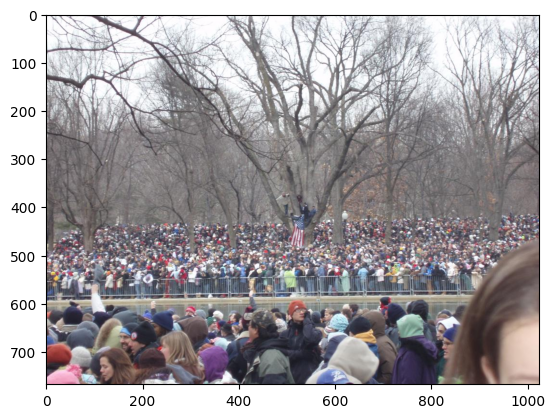

In [150]:
img = pil.open(image_path)
width, height = img.size
imgplot = plt.imshow(img)

In [151]:
gt_file = scipy.io.loadmat(truth_path)
gt = np.asarray(gt_file['image_info'][0][0][0][0][0])
count = int(gt_file['image_info'][0][0][0][0][1])
print("Number of people in image: " + str(count))




Number of people in image: 1546


In [152]:
##Don't need to merge xi after all, done later in code

##print(str(points_xi))
print("Input matrix: " + str(gt))
rot = np.rot90(gt, 1, axes=(0,1))
rot = np.flip(rot, axis=0)
##points_xi = points_xi.reshape(1,1546)
##print(str(points_xi))
##rot = np.concatenate((rot, points_xi), axis=0)
print("Rotated matrix:" + str(rot))
print("Max x: " + str(rot[0].max()) + "\nMax y: " + str(rot[1].max()))



Input matrix: [[ 29.6225116  472.92022152]
 [ 54.35533603 454.96602305]
 [ 51.79045053 460.46220626]
 ...
 [597.89732076 688.27900015]
 [965.77518336 638.44693908]
 [166.9965574  628.1873971 ]]
Rotated matrix:[[ 29.6225116   54.35533603  51.79045053 ... 597.89732076 965.77518336
  166.9965574 ]
 [472.92022152 454.96602305 460.46220626 ... 688.27900015 638.44693908
  628.1873971 ]]
Max x: 1021.8057177069301
Max y: 753.8667864092203


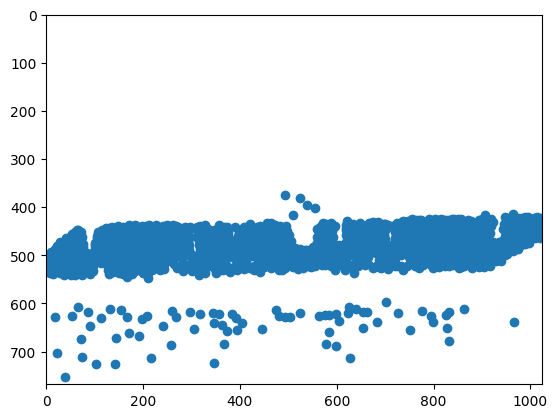

In [153]:
plt.gca().invert_yaxis()
plt.xlim(0,width)
plt.ylim(height,0)
plt.scatter(rot[0], rot[1])

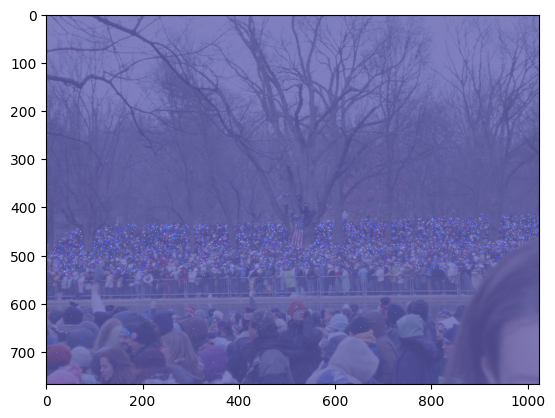

In [155]:
"""
bins = [range(width + 1), range(height + 1)]


hst = np.asarray(np.histogram2d(rot[0], rot[1], bins))
print(str(bins))
print(str(hst))
hst = hst[0]
print("Sum of array (total people) = " + str(hst.sum()))
print("Max value of array (people/pix) = " + str(hst.max()))
print("Array dimensions = " + str(hst.shape) + "vs w*h = " + str(width) + "x" + str(height))
"""
pointMap = np.zeros((height, width))
for pt in gt:
    pointMap[int(pt[1]), int(pt[0])] = 1
plt.imshow(img, alpha=0.5)
##pointMap = pil.fromarray(np.rot90(np.flip(255*hst.astype(np.uint8), axis=1), k=1, axes=(0,1)))
pointImg = pil.fromarray(255*pointMap.astype(np.uint8))

plt.imshow(pointImg, cmap = "jet", alpha=0.5)
plt.show()


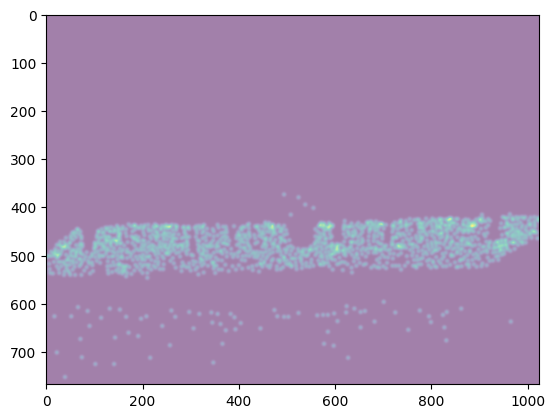

In [157]:

#heatMap = pil.new(mode='L', size=(width,height))
heatMap = cv2.GaussianBlur(pointMap,(0,0),3,3)

plt.imshow(heatMap, alpha=0.5)


(768, 1024)
[  7.94571006   6.69704361   6.89242302 ...  35.6445605  123.57387626
  30.56291244]


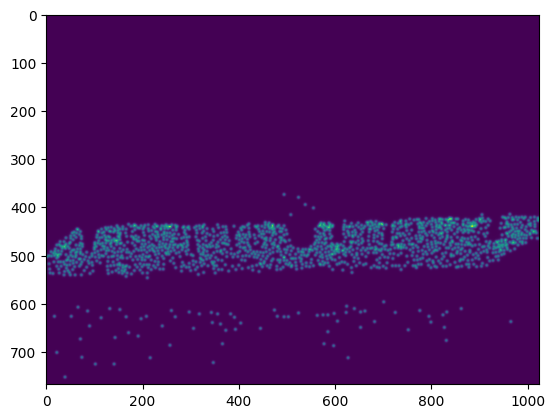

In [168]:
print(str(pointMap.shape))
print(str(ground_truth.findRadius(gt)))
heatMap = ground_truth.gaussian(pointMap, gt)
plt.imshow(heatMap)

In [169]:
heatMap

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.99253889e-03, 2.00917768e-03, 2.06233389e-03, ...,
        3.25777568e-07, 3.25264510e-07, 3.25093327e-07],
       [1.99312494e-03, 2.00974764e-03, 2.06280172e-03, ...,
        3.21882635e-07, 3.21375710e-07, 3.21206574e-07],
       [1.99337273e-03, 2.00998995e-03, 2.06300933e-03, ...,
        3.20586501e-07, 3.20081617e-07, 3.19913162e-07]])